In [1]:
#import
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# List to save the AM
graphs = []

# We explore the graphs
for i in range(0, 10):
    # We convert the .csv to a matrix
    filename = f"./Adjacency_Matrices/network_{i}.csv"
    data = pd.read_csv(filename, header=None)
    matrix = data.values
    
    # Create the graph and adds it to the list
    G = nx.from_numpy_matrix(matrix)
    graphs.append(G)

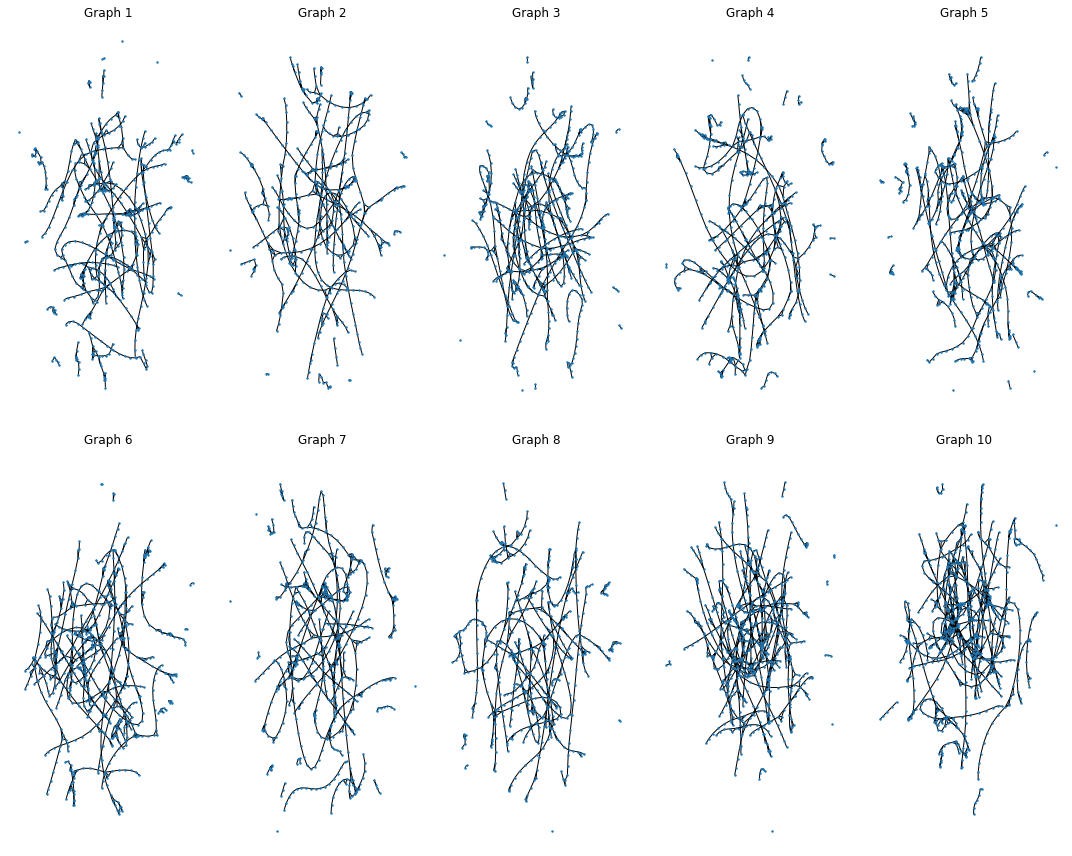

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(15, 12))

for i, G in enumerate(graphs):
    row = i // 5
    col = i % 5
    
    # We plot the graph
    nx.draw(G, ax=axs[row][col], node_size = 2)
    axs[row][col].set_title(f"Graph {i+1}")


plt.tight_layout()

# Show the figure
plt.show()
    

In [4]:
# List to save the values
noNetwork = []
averageDegree = []
averageBetweenness = []
averagePageRank= []
averageClustering = []

# We calculate the metrics
for i, G in tqdm(enumerate(graphs)):
    # Degree Centrality
    degreeCentrality = nx.degree_centrality(G)
    #degree = dict(G.degree())
    averageDegree_ = sum(degreeCentrality.values())/len(degreeCentrality)
    averageDegree.append(averageDegree_ )
    
    # Betweenness centrality
    betweennessCentrality = nx.betweenness_centrality(G)
    averageBetweenness_ = sum(betweennessCentrality.values())/len(betweennessCentrality)
    averageBetweenness.append(averageBetweenness_)
    
    # PageRank
    pageRank = nx.pagerank(G)
    averagePageRank_ = sum(pageRank.values())/len(pageRank)
    averagePageRank.append(averagePageRank_)
    
    # Coeficiente de clustering
    clusteringCoeff = nx.clustering(G)
    averageClustering_ = sum(clusteringCoeff.values())/len(clusteringCoeff)
    averageClustering.append(averageClustering_)
    
    
    noNetwork.append(i+1)

# Create the dataframe
df = pd.DataFrame({'No. Net': noNetwork,
                   'Average Degree': averageDegree,
                   'Average Betweenness': averageBetweenness,
                   'Average PageRank': averagePageRank,
                   'Average Clustering': averageClustering})

# Dataframe
print(df)


10it [00:01,  5.45it/s]

   No. Net  Average Degree  Average Betweenness  Average PageRank  \
0        1        0.004377             0.001681          0.001656   
1        2        0.004354             0.001162          0.001783   
2        3        0.003692             0.001586          0.001433   
3        4        0.004660             0.001111          0.001709   
4        5        0.004349             0.003221          0.001580   
5        6        0.003914             0.001303          0.001416   
6        7        0.004660             0.007853          0.001647   
7        8        0.004241             0.000926          0.001672   
8        9        0.003609             0.004491          0.001340   
9       10        0.003753             0.001306          0.001280   

   Average Clustering  
0            0.285714  
1            0.242543  
2            0.267233  
3            0.308063  
4            0.310366  
5            0.314330  
6            0.289127  
7            0.291288  
8            0.276727  


In [5]:
filename = "metrics.csv"
df.to_csv(filename, index=False)

In [6]:

for i, G in tqdm(enumerate(graphs)):
    # Calculate the metrics
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    page_rank = nx.pagerank(G)
    clustering_coeff = nx.clustering(G)
    
    # We get the 100 nodes with highest and lowest degree
    sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    top_degree = [x[0] for x in sorted_degree_centrality[:100]]
    bottom_degree = [x[0] for x in sorted_degree_centrality[-100:]]
    
    # We get the 100 nodes with highest and lowest Betweenness Crentrality
    sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    top_betweenness = [x[0] for x in sorted_betweenness_centrality[:100]]
    bottom_betweenness = [x[0] for x in sorted_betweenness_centrality[-100:]]
    
    # We get the 100 nodes with highest and lowest pageRank
    sorted_page_rank = sorted(page_rank.items(), key=lambda x: x[1], reverse=True)
    top_page_rank = [x[0] for x in sorted_page_rank[:100]]
    bottom_page_rank = [x[0] for x in sorted_page_rank[-100:]]
    
    # We get the 100 nodes with highest and lowest clustering
    sorted_clustering_coeff = sorted(clustering_coeff.items(), key=lambda x: x[1], reverse=True)
    top_clustering = [x[0] for x in sorted_clustering_coeff[:100]]
    bottom_clustering = [x[0] for x in sorted_clustering_coeff[-100:]]
    
    # Save the file
    df = pd.DataFrame({'Top Degree Centrality': top_degree,
                       'Top Betweenness Centrality': top_betweenness,
                       'Top Page Rank': top_page_rank,
                       'Top Clustering Coefficient': top_clustering,
                       'Bottom Degree Centrality': bottom_degree,
                       'Bottom Betweenness Centrality': bottom_betweenness,
                       'Bottom Page Rank': bottom_page_rank,
                       'Bottom Clustering Coefficient': bottom_clustering})
    
    filename = f"./network_metrics/network_{i}.csv"
    df.to_csv(filename, index=False)

10it [00:02,  4.98it/s]
